# Import the necessary Library required for K means Clustering model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
#sklearn 
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import scale # for scaling the data
import sklearn.metrics as sm # for evaluating the model
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

# Parameters for the Visualization

In [2]:
%matplotlib inline 
rcParams["figure.figsize"] =20,10

# Load and scale the Dataset.

In [3]:
iris = datasets.load_iris()
#scale the data
data = scale(iris.data) # scale the iris data
target = pd.DataFrame(iris.target) # define the target 
variable_names = iris.feature_names
data[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

# Cluster Model and model the output

In [4]:
clustering = KMeans(n_clusters=3,random_state=5)
#fit the dataset
clustering.fit(data)

iris_df = pd.DataFrame(iris.data)
iris_df.columns = ["sepal_length","sepal_width","petal_length","petal_width" ]
target.columns =["Target"]

# Plot the Model Output using Matplotlib

Text(0.5, 1.0, 'K means Classifcation')

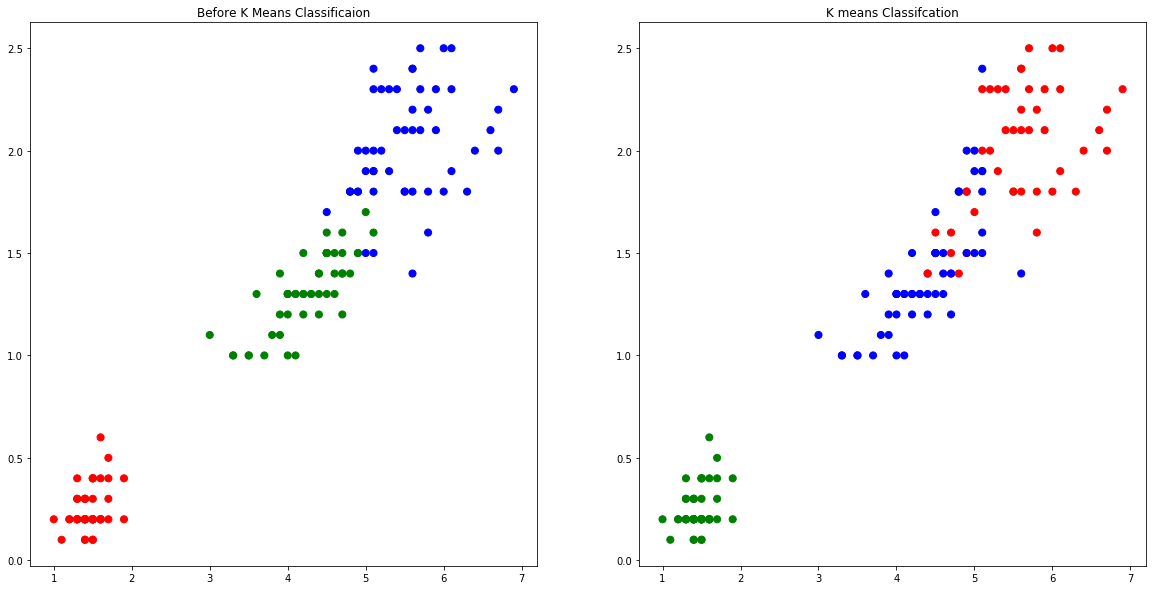

In [5]:
colors = np.array(["Red","Green","Blue"])
plt.subplot(1,2,1)
plt.scatter(x=iris_df["petal_length"] ,y= iris_df["petal_width"],c = colors[iris.target],s=50)
plt.title("Before K Means Classificaion")

plt.subplot(1,2,2)
plt.scatter(x=iris_df["petal_length"] ,y= iris_df["petal_width"],c = colors[clustering.labels_],s=50)
plt.title("K means Classifcation")

Text(0.5, 1.0, 'K means Classifcation')

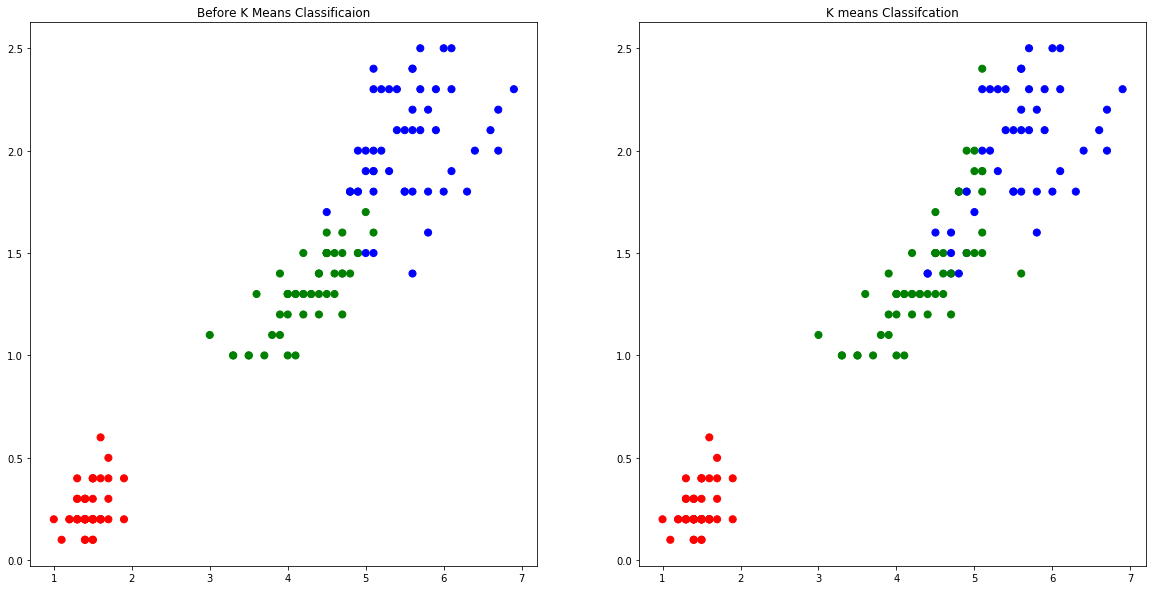

In [6]:
relabel = np.choose(clustering.labels_,[2,0,1]).astype(np.int64)
colors = np.array(["Red","Green","Blue"])
plt.subplot(1,2,1)
plt.scatter(x=iris_df.petal_length ,y= iris_df.petal_width,c = colors[iris.target],s=50)
plt.title("Before K Means Classificaion")

plt.subplot(1,2,2)
plt.scatter(x=iris_df.petal_length ,y= iris_df.petal_width,c = colors[relabel],s=50)
plt.title("K means Classifcation")

# Accuracy of the Cluster Results

In [7]:
print(classification_report(target,relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

